In [34]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [35]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\Nguyen_Dupuis_0515.xlsx', sheet_name='demand_info')
print(my_demand)

# set parameter
origin_zone = ['r1','r2']
destination_zone = ['s1','s2']
theta_1 = 1 # path 
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 30
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 20 # RMB
lamda_0_transit = 5
#N_hailing = 500
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

A_coefficient = [1,2,3,4]
fleet_size = np.arange(1000, 2501, 100)
results = []
for A_use in A_coefficient:
    print('waiting time coefficient: {0}'.format(A_use))
    res3 = []
    for RH in fleet_size:
        dfx = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                            origin_zone= origin_zone, destination_zone= destination_zone,
                            miu_in= miu_in, miu_out= miu_out,
                            lamda_0_auto= lamda_0_auto,
                            lamda_0_hailing= lamda_0_hailing,
                            lamda_0_transit= lamda_0_transit,
                            lamda_0_PR= lamda_0_PR,
                            theta_1= theta_1, theta_2= theta_2,
                            A=A_use, N_hailing= RH, maximum_iter=300)
        res3.append(dfx)
    
    # ride-hailing vehicle number
    n_idle = [res3[i][5].tail(1).iloc[0]['n_idle'] for i in range(len(res3))]
    waiting_hailing = [res3[i][5].tail(1).iloc[0]['wait_time'] for i in range(len(res3))]

    # OD cost
    def od_cost(path, od):
        cost = sum(abs(path[path['OD_pair'] == od]['path_cost']) * path[path['OD_pair'] == od]['path_flow'])
        return cost
    
    od_1_cost = []
    od_2_cost = []
    od_3_cost = []
    od_4_cost = []
    for i in range(len(res3)):
        flow_set = res3[i][2].tail(res3[i][6])
        od_1_cost.append(od_cost(flow_set, 'r1-s1'))
        od_2_cost.append(od_cost(flow_set, 'r1-s2'))
        od_3_cost.append(od_cost(flow_set, 'r2-s1'))
        od_4_cost.append(od_cost(flow_set, 'r2-s2'))
    
    total_cost = []
    for i in range(len(res3)):
        flow_set = res3[i][2].tail(res3[i][6])
        cost = sum(abs(flow_set['path_cost']) * flow_set['path_flow'])
        total_cost.append(cost)
    
    # mode share
    PR_logit = [res3[i][4].tail(res3[i][7]).iloc[0]['mode_logit'] for i in range(len(res3))]
    RT_logit = [res3[i][4].tail(res3[i][7]).iloc[1]['mode_logit'] for i in range(len(res3))]
    auto_logit = [res3[i][4].tail(res3[i][7]).iloc[2]['mode_logit'] for i in range(len(res3))]
    bus_logit = [res3[i][4].tail(res3[i][7]).iloc[3]['mode_logit'] for i in range(len(res3))]

    # convert to dataframe
    df = pd.DataFrame({
            'fleet_size': fleet_size,
            'n_idle': n_idle,
            'waiting_hailing': waiting_hailing,
            'od_1_cost': od_1_cost,
            'od_2_cost': od_2_cost,
            'od_3_cost': od_3_cost,
            'od_4_cost': od_4_cost,
            'total_cost': total_cost,
            'auto_logit': auto_logit,
            'bus_logit': bus_logit,
            'PR_logit': PR_logit,
            'RT_logit': RT_logit,
            'waiting_coefficient': A_use})
    
    results.append(df)

  OD_pair  demand
0   r1-s1    5000
1   r1-s2    4000
2   r2-s1    3500
3   r2-s2    3000
0.6517
waiting time coefficient: 1
['path-1', 'path-2', 'path-3', 'path-4', 'path-5', 'path-6', 'path-7', 'path-8', 'path-9', 'path-10', 'path-11', 'path-12', 'path-13', 'path-14', 'path-15', 'path-16', 'path-17', 'path-18', 'path-19', 'path-20', 'path-21', 'path-22', 'path-23', 'path-24', 'path-25', 'path-26', 'path-27', 'path-28', 'path-29', 'path-30', 'path-31', 'path-32', 'path-33', 'path-34', 'path-35', 'path-36', 'path-37', 'path-38', 'path-39', 'path-40', 'path-41', 'path-42', 'path-43', 'path-44', 'path-45', 'path-46', 'path-47', 'path-48', 'path-49', 'path-50', 'path-51', 'path-52', 'path-53', 'path-54', 'path-55', 'path-56', 'path-57', 'path-58', 'path-59', 'path-60', 'path-61', 'path-62', 'path-63', 'path-64', 'path-65', 'path-66']
['auto', 'auto', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'auto', 'auto', 'auto', 'P&R', 'transit', 'R&T', 'R&T', 'R&T', 'R&T', 'R&T', '

In [36]:
results[3]

,fleet_size,n_idle,waiting_hailing,od_1_cost,od_2_cost,od_3_cost,od_4_cost,total_cost,auto_logit,bus_logit,PR_logit,RT_logit,waiting_coefficient
0,1000,205.892962,15.636228,383257.054848,198827.757319,461449.305873,130304.290319,1.173838e+06,0.281134,0.244505,0.200629,0.273731,4
1,1100,373.970133,11.800392,382298.253751,198417.407638,460281.518055,130042.616941,1.171040e+06,0.281028,0.244066,0.200342,0.274564,4
2,1200,501.313430,10.260782,381908.692459,198250.233566,459793.546312,129936.224914,1.169889e+06,0.280986,0.243889,0.200224,0.274901,4
3,1300,618.851825,9.274741,381657.277926,198142.493988,459479.722588,129867.943524,1.169147e+06,0.280959,0.243775,0.200149,0.275117,4
4,1400,731.622890,8.556599,381472.495022,198063.518705,459247.283756,129818.110083,1.168601e+06,0.280941,0.243691,0.200094,0.275275,4
5,1500,841.585069,7.997311,381327.521245,198001.767390,459067.642282,129779.371318,1.168176e+06,0.280926,0.243626,0.200051,0.275398,4
6,1600,949.683958,7.543151,381208.153021,197951.274430,458922.849210,129748.029788,1.167830e+06,0.280914,0.243573,0.200016,0.275498,4
7,1700,1056.460294,7.163487,381105.887423,197908.562371,458802.996447,129722.011929,1.167539e+06,0.280904,0.243528,0.199987,0.275581,4
8,1800,1162.248776,6.839210,381038.360530,197876.847922,458691.223850,129698.522885,1.167305e+06,0.280894,0.243491,0.199962,0.275654,4
9,1900,1267.093642,6.558047,380973.223963,197846.384624,458609.601371,129678.144694,1.167107e+06,0.280884,0.243459,0.199941,0.275717,4


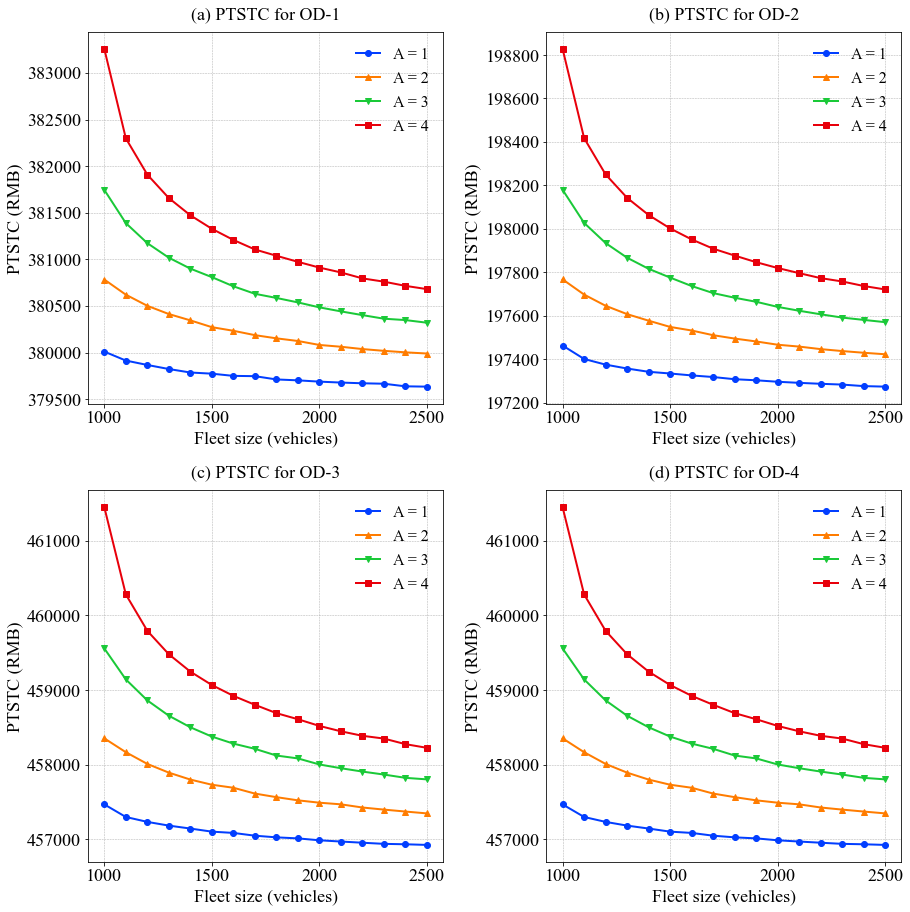

In [37]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18


fig = plt.figure(figsize=(13,13))
markers = ['o','^','v','s','h','D','p','<','>']

ax = plt.subplot(2,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['od_1_cost'], '-', lw = 2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))
ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('PTSTC (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(a) PTSTC for OD-1', fontsize=18, loc='center', y=1.02)
#ax.set_xlim(250,2050)
#ax.set_xticks(np.arange(300, 2050,200))

ax = plt.subplot(2,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['od_2_cost'], '-', lw = 2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))
ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('PTSTC (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(b) PTSTC for OD-2', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,3)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['od_3_cost'], '-', lw = 2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))
ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('PTSTC (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(c) PTSTC for OD-3', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,4)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['od_3_cost'], '-', lw = 2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))
ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('PTSTC (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(d) PTSTC for OD-4', fontsize=18, loc='center', y=1.02)

plt.tight_layout()
plt.show()

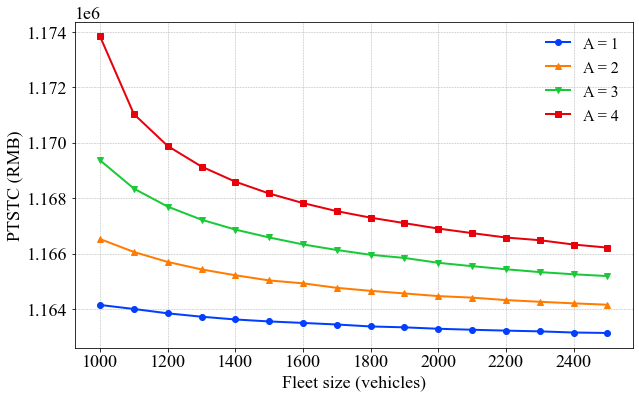

In [38]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
ax.grid(ls = '--', lw = 0.5, zorder = 0)

for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['total_cost'], '-', lw = 2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))

ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('PTSTC (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
#ax.set_xlim(250,2050)
#ax.set_xticks(np.arange(300, 2050,200))

plt.show()

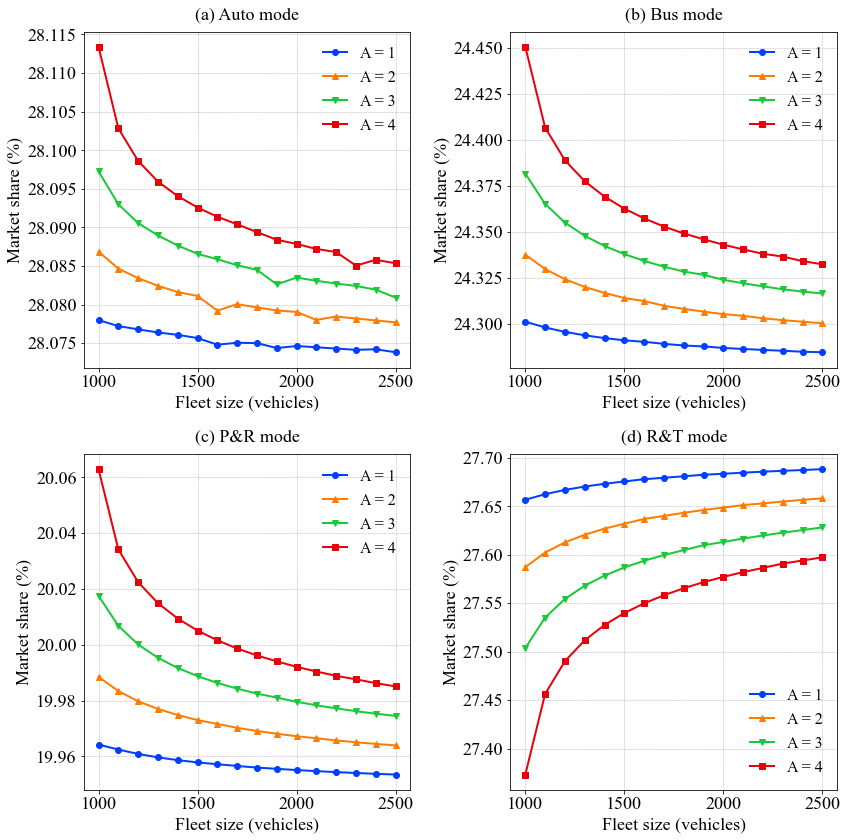

In [39]:
fig = plt.figure(figsize=(12,12))
markers = ['o','^','v','s','h','D','p','<','>']

ax = plt.subplot(2,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['auto_logit']*100, '-', lw=2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))
ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(a) Auto mode', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['bus_logit']*100, '-', lw=2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))
ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(b) Bus mode', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,3)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['PR_logit']*100, '-', lw=2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))
ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(c) P&R mode', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,4)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
for i in range(len(results)):
    ax.plot(results[i]['fleet_size'], results[i]['RT_logit']*100, '-', lw=2, marker=markers[i], label = 'A = {0}'.format(A_coefficient[i]))
ax.set_xlabel('Fleet size (vehicles)')
ax.set_ylabel('Market share (%)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5)
ax.set_title('(d) R&T mode', fontsize=18, loc='center', y=1.02)

plt.tight_layout()
plt.show()

In [40]:
res3[0][6]

66